<h2> Getting set up with BigQuery and Jupter Notebooks (for Mac)


- Install python and pip if you haven't already

- Install Jupyter Notebook: 
        < pip install jupyter > 
                   or  
        < pip3 install jupyter >


-  Install the Google Cloud CLI via <a> https://cloud.google.com/sdk/docs/install-sdk</a> 
        Make sure to download the correct version for your machine by running the following command:
        < uname -m >



-  Once you have download the Google Cloud SDK and opened the .tar.gz file, run the following commands:
        < ./google-cloud-sdk/install.sh > 
        < ./google-cloud-sdk/bin/gcloud init>
        Follow the prompts and select 'broadband-data' as your default project
        


-  Close the terminal window and open a new window. Then run: 
        < gcloud iam service-accounts keys create application_default_credentials.json --iam-account=broadband@broadband-data.iam.gserviceaccount.com >
        Finally, run the following command to set up your default authentication:
        < gcloud auth application-default login >
  


-  Open up jupyter notebook in the folder you intend on using with the following command:
        < jupyter notebook >  



-  The Jupyter Notebook server should start up and it should open up a file navigation screen. Click on "new" and create a new notebook or download this file into the correct folder and open it (see image below)
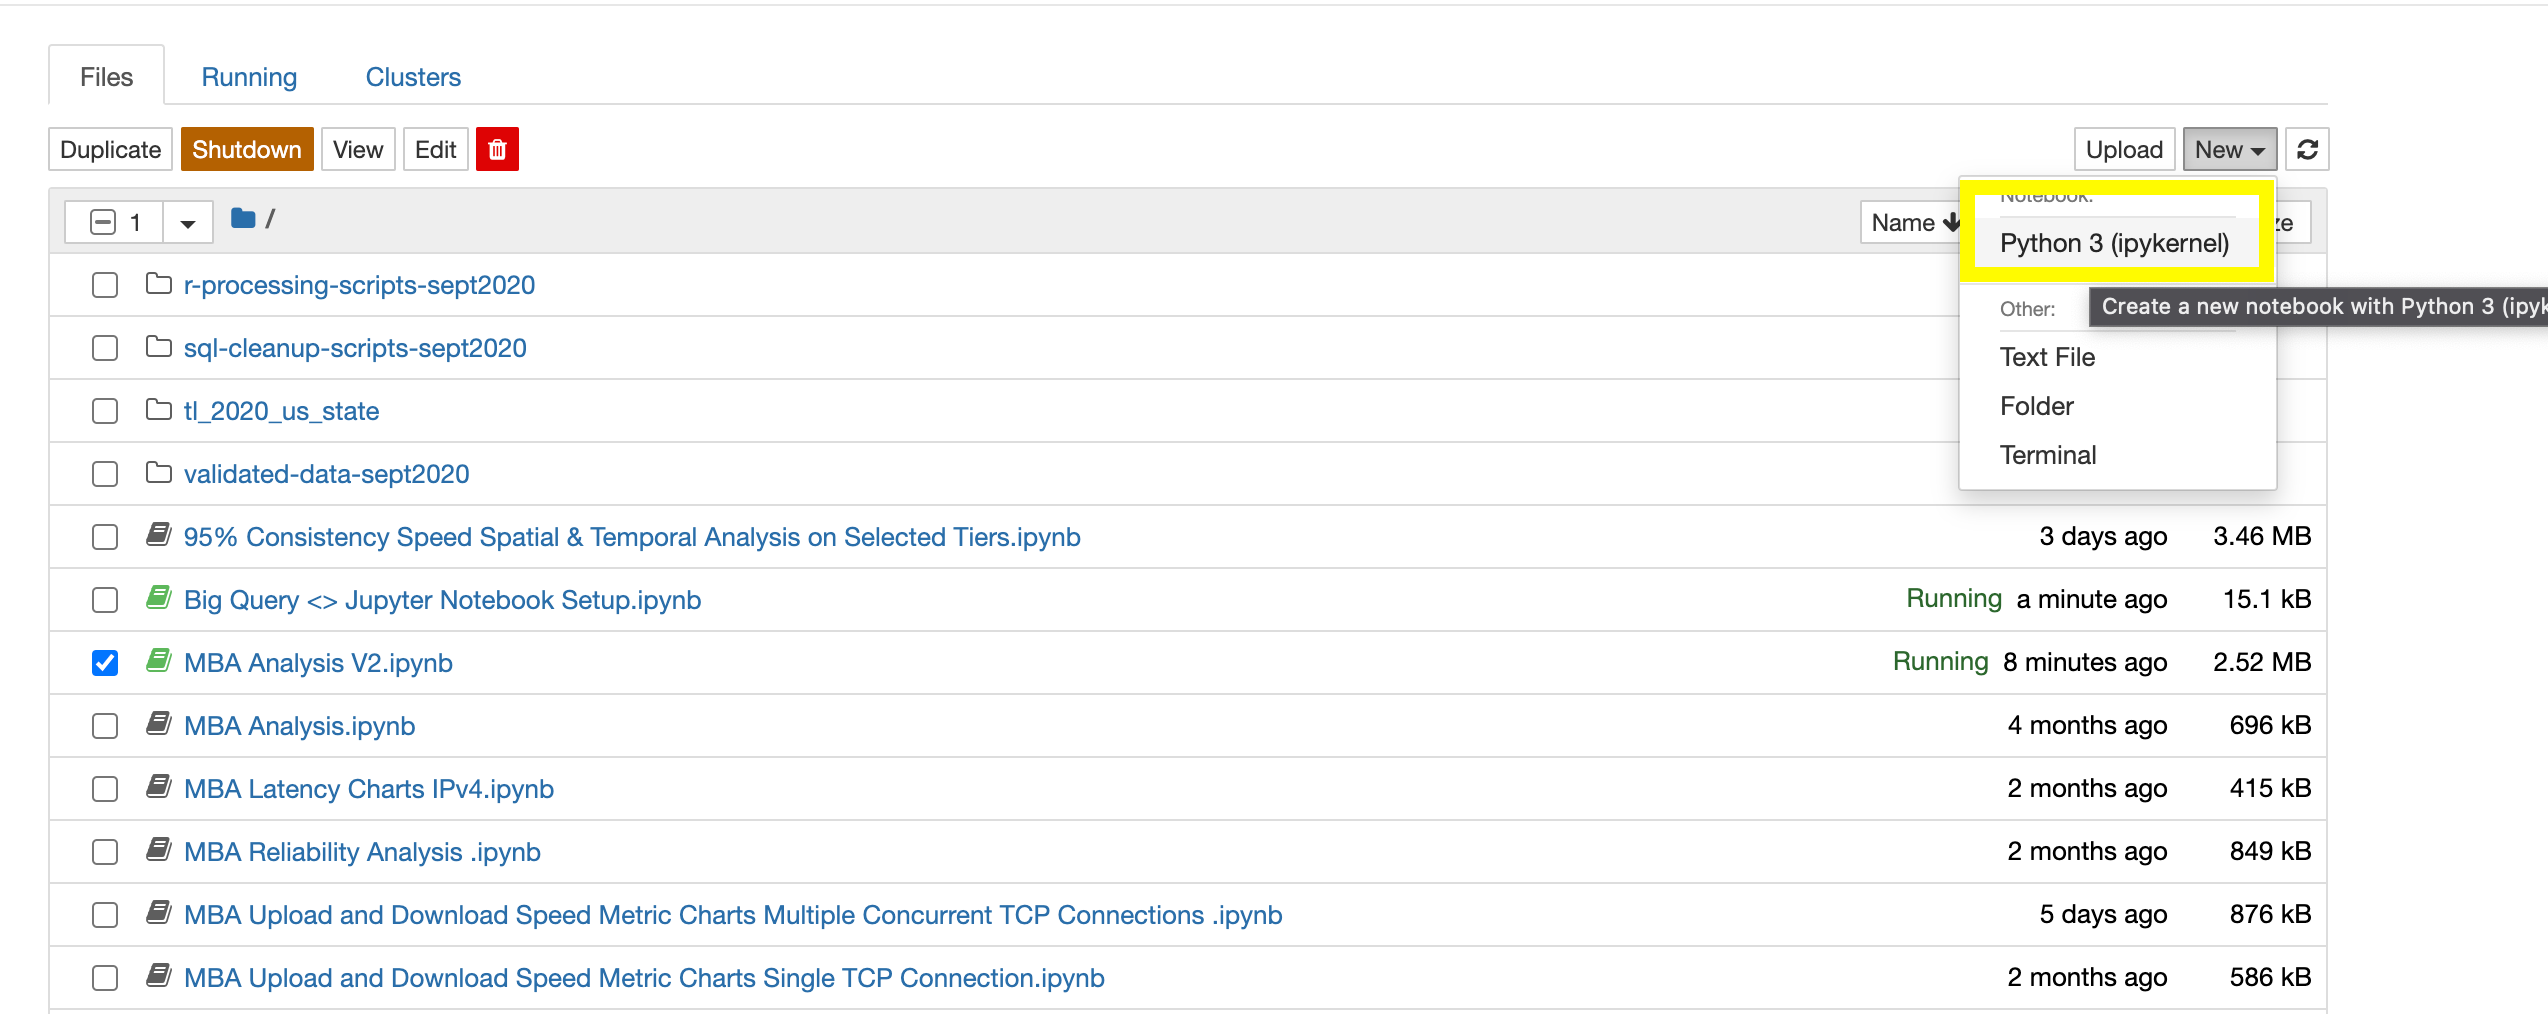

-  Copy and paste the code below into the first cell of your notebook. Don't forget to change the name to your local user name 

In [1]:
import os
from google.cloud import bigquery
import pandas as pd


# ***I commented the following imports out but you will likely need at least some of them at some point***
# import matplotlib.pyplot as plt
# import numpy as np
# import scipy
# from scipy.stats import norm


# dont forget to replace <andreasfreund> with your local username
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = "/Users/andreasfreund/.config/gcloud/application_default_credentials.json"
%load_ext google.cloud.bigquery
client = bigquery.Client()

print('Done!')

Done!


Run the test query below to make sure everything is working (this is the MBA dataset I work with in our bigquery db)

In [2]:
testQuery = """
SELECT * 
FROM `broadband-data.mba_data.curr_httpgetmt` as httpmt
INNER JOIN `broadband-data.mba_data.unit-profile-sept2020` as mt ON httpmt.unit_id=mt.Unit_ID
Limit 5
"""

# Runs the query and converts it into a dataframe
testQueryDF = client.query(testQuery).to_dataframe()
print('Done!')

Done!


In [3]:
testQueryDF.head()

,unit_id,dtime,ddate,target,address,fetch_time,bytes_total,bytes_sec,bytes_sec_interval,warmup_time,...,Unit_ID_1,ISP,Technology,State,Census,timezone_offset,timezone_offset_dst,Download,Upload,Whitebox_Model
0,613972,2020-09-05 23:29:55+00:00,2020-09-05,samknows1.nyc2.level3.net,4.71.185.62,10000207,138606904,13860403,13860403,5000052,...,613972,Optimum,Cable,NY,Northeast,-5,-4,100.0,35.0,wdr3600
1,613972,2020-09-06 11:28:32+00:00,2020-09-06,samknows1.nyc2.level3.net,4.71.185.62,10000148,144443792,14444165,14444165,1500080,...,613972,Optimum,Cable,NY,Northeast,-5,-4,100.0,35.0,wdr3600
2,613972,2020-09-06 03:32:03+00:00,2020-09-06,samknows1.nyc2.level3.net,4.71.185.62,10000203,144375736,14437281,14437281,1500052,...,613972,Optimum,Cable,NY,Northeast,-5,-4,100.0,35.0,wdr3600
3,613972,2020-09-06 07:26:55+00:00,2020-09-06,samknows1.nyc2.level3.net,4.71.185.62,10000171,144466960,14446449,14446449,5000085,...,613972,Optimum,Cable,NY,Northeast,-5,-4,100.0,35.0,wdr3600
4,613972,2020-09-06 15:29:42+00:00,2020-09-06,samknows1.nyc2.level3.net,4.71.185.62,10000187,144449584,14444688,14444688,1500051,...,613972,Optimum,Cable,NY,Northeast,-5,-4,100.0,35.0,wdr3600


Here's another way of running a query from Jupyter

In [4]:
%%bigquery
SELECT *
FROM `broadband-data.mba_data.curr_httpgetmt` as httpmt
INNER JOIN `broadband-data.mba_data.unit-profile-sept2020` as mt ON httpmt.unit_id=mt.Unit_ID
Limit 5

Downloading: 100%|██████████████████████████████| 5/5 [00:01<00:00,  4.08rows/s]


,unit_id,dtime,ddate,target,address,fetch_time,bytes_total,bytes_sec,bytes_sec_interval,warmup_time,...,Unit_ID_1,ISP,Technology,State,Census,timezone_offset,timezone_offset_dst,Download,Upload,Whitebox_Model
0,613972,2020-09-05 23:29:55+00:00,2020-09-05,samknows1.nyc2.level3.net,4.71.185.62,10000207,138606904,13860403,13860403,5000052,...,613972,Optimum,Cable,NY,Northeast,-5,-4,100.0,35.0,wdr3600
1,613972,2020-09-06 11:28:32+00:00,2020-09-06,samknows1.nyc2.level3.net,4.71.185.62,10000148,144443792,14444165,14444165,1500080,...,613972,Optimum,Cable,NY,Northeast,-5,-4,100.0,35.0,wdr3600
2,613972,2020-09-06 03:32:03+00:00,2020-09-06,samknows1.nyc2.level3.net,4.71.185.62,10000203,144375736,14437281,14437281,1500052,...,613972,Optimum,Cable,NY,Northeast,-5,-4,100.0,35.0,wdr3600
3,613972,2020-09-06 07:26:55+00:00,2020-09-06,samknows1.nyc2.level3.net,4.71.185.62,10000171,144466960,14446449,14446449,5000085,...,613972,Optimum,Cable,NY,Northeast,-5,-4,100.0,35.0,wdr3600
4,613972,2020-09-06 15:29:42+00:00,2020-09-06,samknows1.nyc2.level3.net,4.71.185.62,10000187,144449584,14444688,14444688,1500051,...,613972,Optimum,Cable,NY,Northeast,-5,-4,100.0,35.0,wdr3600


In [5]:
# Note that the query run above is not saved to any variable. 
# To save the results of the query, you can do the following:

In [6]:
%%bigquery test
SELECT * 
FROM `broadband-data.mba_data.curr_httpgetmt` as httpmt
INNER JOIN `broadband-data.mba_data.unit-profile-sept2020` as mt ON httpmt.unit_id=mt.Unit_ID
Limit 5

Downloading: 100%|██████████████████████████████| 5/5 [00:01<00:00,  3.52rows/s]


In [7]:
# Note that I saved the above query to a variable named test. See what it does below by running this cell
test.head()

,unit_id,dtime,ddate,target,address,fetch_time,bytes_total,bytes_sec,bytes_sec_interval,warmup_time,...,Unit_ID_1,ISP,Technology,State,Census,timezone_offset,timezone_offset_dst,Download,Upload,Whitebox_Model
0,613972,2020-09-05 23:29:55+00:00,2020-09-05,samknows1.nyc2.level3.net,4.71.185.62,10000207,138606904,13860403,13860403,5000052,...,613972,Optimum,Cable,NY,Northeast,-5,-4,100.0,35.0,wdr3600
1,613972,2020-09-06 11:28:32+00:00,2020-09-06,samknows1.nyc2.level3.net,4.71.185.62,10000148,144443792,14444165,14444165,1500080,...,613972,Optimum,Cable,NY,Northeast,-5,-4,100.0,35.0,wdr3600
2,613972,2020-09-06 03:32:03+00:00,2020-09-06,samknows1.nyc2.level3.net,4.71.185.62,10000203,144375736,14437281,14437281,1500052,...,613972,Optimum,Cable,NY,Northeast,-5,-4,100.0,35.0,wdr3600
3,613972,2020-09-06 07:26:55+00:00,2020-09-06,samknows1.nyc2.level3.net,4.71.185.62,10000171,144466960,14446449,14446449,5000085,...,613972,Optimum,Cable,NY,Northeast,-5,-4,100.0,35.0,wdr3600
4,613972,2020-09-06 15:29:42+00:00,2020-09-06,samknows1.nyc2.level3.net,4.71.185.62,10000187,144449584,14444688,14444688,1500051,...,613972,Optimum,Cable,NY,Northeast,-5,-4,100.0,35.0,wdr3600


<AxesSubplot:xlabel='ISP'>

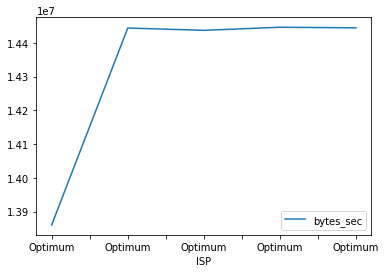

In [8]:
# Sample chart (this is not actually meaningful but shows how you can plot stuff)
test.plot(x = 'ISP', y = 'bytes_sec')

-  You may need to manually install pandas, google-cloud-storage, google-cloud-bigquery, and a few other packages if you're encountering errors. Here's how you do it: 
        < pip install google-cloud-bigquery > 
        < pip install pandas > 
        < pip install google-cloud-storage >
        < pip install db-dtypes> 
        < pip install matplotlib > 
        < pip install tqdm > 

<i>You will almost certainly need the following libraries as well:</i>
        <p>-Pandas (nothing works without this)
        <p>-NumPy 
        <p>-Matplotlib
            
For more help getting started, these links may also be helpful:
        <p><a>https://cloud.google.com/bigquery/docs/visualize-jupyter</a>
         <p><a>https://github.com/afreund415/MBA-broadband-research</a>

If you have any questions, I can be reached at a.c.freund@columbia.edu